## ProjF5 - Final Model

Use this document as a template to provide the evaluation of your final model. You are welcome to go in as much depth as needed.

Make sure you keep the sections specified in this template, but you are welcome to add more cells with your code or explanation as needed.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os


### 1. Load and Prepare Data

This should illustrate your code for loading the dataset and the split into training, validation and testing. You can add steps like pre-processing if needed.

**1.1 LOADING TRAINNING AND TESTING DATA**

The training and testing data was uploaded on kaggle for ease of usability.

LINKS :

ORIGINAL DATA : https://www.kaggle.com/datasets/asaxen1701/ecgdataset

IMAGE DATA TESTING : https://www.kaggle.com/datasets/asaxen1701/resized-dataset-test

IMAGE DATA TRAINING : https://www.kaggle.com/datasets/asaxen1701/resized-dataset

In [ ]:
train_data = pd.read_csv('/kaggle/input/ecgdataset/train_data.csv')
test_data = pd.read_csv('/kaggle/input/ecgdataset/test_data.csv')

row_length = len(train_data.iloc[0,:])
new_columns = list(range(0, row_length))

# Replace column names
train_data.columns = new_columns
test_data.columns = new_columns


In [ ]:
train_data

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87548,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87549,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


**1.2 DATA IMBALANCE HANDLING**

This section generates equal number of samples for all the classes in the dataset using oversampling.

In [ ]:

print(train_data[187].value_counts())

from sklearn.utils import resample
df_1=train_data[train_data[187]==1]
df_2=train_data[train_data[187]==2]
df_3=train_data[train_data[187]==3]
df_4=train_data[train_data[187]==4]
df_0=(train_data[train_data[187]==0]).sample(n=20000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

train_data=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])
train_data.reset_index(drop=True, inplace=True)

class_samples = []
for class_label in [0, 1, 2, 3, 4]:
    class_samples.append(train_data[train_data[187] == class_label].sample(n=20000, random_state=42))

# Concatenate the selected samples
train_data_selected = pd.concat(class_samples)

# Reset the index
train_data_selected.reset_index(drop=True, inplace=True)

print(train_data_selected[187].value_counts())

187
0.0    72470
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: count, dtype: int64
187
0.0    20000
1.0    20000
2.0    20000
3.0    20000
4.0    20000
Name: count, dtype: int64


**1.3 Class Wise Splitting of Training/Testing Data**

This section was used for splitting the training and testing data into respective classes so that the image data could be generated for each of the classes, for both the training and testing dataset.

In [ ]:
class_dataframes = {}

# Group train_data by class label and store each group in a separate DataFrame
for class_label in range(5):  # Assuming there are 5 classes
    class_df = test_data[test_data[187] == class_label]
    class_dataframes[class_label] = class_df

# Access each class DataFrame using the class label as key
class_0_df = class_dataframes[0]
class_0_df.reset_index(drop=True, inplace=True)

class_1_df = class_dataframes[1]
class_1_df.reset_index(drop=True, inplace=True)

class_2_df = class_dataframes[2]
class_2_df.reset_index(drop=True, inplace=True)

class_3_df = class_dataframes[3]
class_3_df.reset_index(drop=True, inplace=True)

class_4_df = class_dataframes[4]
class_4_df.reset_index(drop=True, inplace=True)

class_4_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.869136,0.540741,0.316049,0.133333,0.103704,0.103704,0.108642,0.101235,0.108642,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,0.736457,0.644217,0.534407,0.418741,0.298682,0.190337,0.118594,0.071742,0.042460,0.046852,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2,0.732174,0.620870,0.478261,0.339130,0.194783,0.114783,0.033043,0.019130,0.036522,0.085217,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
3,1.000000,0.754476,0.473146,0.242967,0.191816,0.189258,0.202046,0.209719,0.219949,0.204604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
4,0.975553,0.910361,0.846333,0.772992,0.689173,0.569267,0.434226,0.292200,0.162980,0.104773,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1604,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1605,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1606,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


**1.4 GENERATING IMAGE DATA FROM HEARTBEAT PLOTS**

The plots for the hearbeat samples were used for generating the image data. These were resized into 64X64 images and saved to the respective train/label_{num} and test/label_{num} directories.

In [ ]:
from PIL import Image

# Create folders for each label if they don't exist
for label in range(5):
    folder_name = f'test/label_{label}_test'
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)

plt.figure(figsize=(20, 10))

# Assuming train_data is your DataFrame containing the ECG data


for i, idx in enumerate(class_1_df.index, start=1):
    folder_name = f'test/label_1_test'  # Folder name for the current label
    plt.figure(figsize=(2, 1))
    plt.plot(class_1_df.loc[idx])

    # Turn off axis
    plt.axis('off')

    # Convert plot to grayscale
    plt.gray()

    # Save each plot as an image in the corresponding label folder
    plt.savefig(f'{folder_name}/test_{i}.png', bbox_inches='tight', pad_inches=0)  # Adjust file name as needed
    image = Image.open(f'{folder_name}/test_{i}.png')

# Resize the image
    desired_width = 64
    desired_height = 64
    resized_image = image.resize((desired_width, desired_height))

    # Display the resized image (optional)
    resized_image.show()
    resized_image.save(f'{folder_name}/test_{i}.png')
    # Close the current plot to avoid overlapping
    plt.close()


The files were stored as zip for ease of use and creating the dataset

In [ ]:
import zipfile
import os

# Define the directory containing the folders to zip
base_directory = '/kaggle/working/test'  # Update this with your directory path

# Iterate over each folder inside the base directory
# for folder_name in os.listdir(base_directory):
#     if os.path.isdir(os.path.join(base_directory, folder_name)):
        # Define the path for the zip file
zip_file_path = f'/kaggle/working/test/label_1_test.zip'

# Create a zip file for the current folder
with zipfile.ZipFile(zip_file_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
    folder_path = os.path.join(base_directory, 'label_1_test')
    # Add the contents of the folder to the zip file
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), folder_path))

# Output the zip file path
print(f"Zip file created: {zip_file_path}")



Zip file created: /kaggle/working/test/label_1_test.zip


In [ ]:
pip install tensorflow

**1.5 LOADING THE IMAGE DATA AND CONVERTING TO ARRAYS FOR MODEL TRAINING**


The image dataset was converted to array and normalized with pixel values between [0,1]. This was done for both the training and testing dataset.

Training : '/kaggle/input/resized-dataset'

Testing : '/kaggle/input/resized-dataset-test'

In [ ]:
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

# Base directory where the label directories are located
base_directory = '/kaggle/input/resized-dataset'

# Assuming the images are 64x64
image_size = (64, 64)
num_classes = 5  # Five classes corresponding to labels 0-4

# We will determine the total number of images by inspecting the directories
num_images = 0
for label_num in range(num_classes):
    label_directory = os.path.join(base_directory, f'label_{label_num}')
    num_images += len(os.listdir(label_directory))

# Initialize arrays for storing the images and labels
images = np.zeros((num_images, 64, 64, 1), dtype='float32')
labels = np.zeros((num_images,), dtype='int')

# Load images and labels
current_index = 0
for label_num in range(num_classes):
    label_directory = os.path.join(base_directory, f'label_{label_num}')
    print(f'label_{label_num}')
    for image_name in os.listdir(label_directory):

        image_path = os.path.join(label_directory, image_name)
        image = load_img(image_path, color_mode='grayscale',target_size=image_size)
        image = img_to_array(image)
        image /= 255.0  # Normalize to [0,1]
        images[current_index] = image
        labels[current_index] = label_num
        current_index += 1

# Convert labels to categorical (one-hot encoding)
labels = to_categorical(labels, num_classes=num_classes)




In [ ]:
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

# Base directory where the label directories are located
test_base_directory = '/kaggle/input/resized-dataset-test'

# Assuming the images are 64x64
test_image_size = (64, 64)
test_num_classes = 5  # Five classes corresponding to labels 0-4

# We will determine the total number of images by inspecting the directories
test_num_images = 0
for label_num in range(test_num_classes):
    label_directory = os.path.join(test_base_directory, f'label_{label_num}_test')
    test_num_images += len(os.listdir(label_directory))

# Initialize arrays for storing the images and labels
test_images = np.zeros((test_num_images, 64, 64, 1), dtype='float32')
test_labels = np.zeros((test_num_images,), dtype='int')

# Load images and labels
test_current_index = 0
for label_num in range(test_num_classes):
    label_directory = os.path.join(test_base_directory, f'label_{label_num}_test')
    print(f'label_{label_num}_test')
    for image_name in os.listdir(label_directory):

        image_path = os.path.join(label_directory, image_name)
        image = load_img(image_path, color_mode='grayscale',target_size=test_image_size)
        image = img_to_array(image)
        image /= 255.0  # Normalize to [0,1]
        test_images[test_current_index] = image
        test_labels[test_current_index] = label_num
        test_current_index += 1

# Convert labels to categorical (one-hot encoding)
test_labels = to_categorical(test_labels, num_classes=test_num_classes)

Example output for the normalized image array.

In [ ]:
test_labels

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

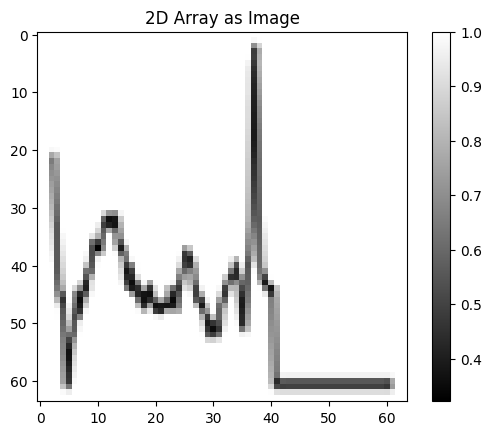

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(images[0], cmap='gray', interpolation='none')  # 'cmap' specifies the color map
plt.colorbar()  # Optionally add a color bar to show the mapping of values to colors
plt.title('2D Array as Image')
plt.show()

### 2. Prepare your Final Model

Here you can have your code to either train (e.g., if you are building it from scratch) your model. These steps may require you to use other packages or python files. You can just call them here. You don't have to include them in your submission. Remember that we will be looking at the saved outputs in the notebooked and we will not run the entire notebook.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Create the Sequential model
model = Sequential()

# Layer 2: Convolutional Layer with 20 filters, a kernel size of 2x2, stride of 1, and 'same' padding
model.add(Conv2D(20, kernel_size=(2, 2), strides=(1, 1), padding='same', input_shape=(64, 64, 1), activation='relu'))

# Layer 3: Max Pooling Layer with a pool size of 2x2 and stride of 2
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))
# Layer 4: Convolutional Layer with 50 filters, a kernel size of 2x2, stride of 1, and 'same' padding
model.add(Conv2D(50, kernel_size=(2, 2), strides=(1, 1), padding='same', activation='relu'))

# Layer 5: Max Pooling Layer with a pool size of 2x2 and stride of 2
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

# Layer 6: Convolutional Layer with 100 filters, a kernel size of 2x2, stride of 1, and 'same' padding
model.add(Conv2D(50, kernel_size=(2, 2), strides=(1, 1), padding='same', activation='relu'))

# Layer 7: Max Pooling Layer with a pool size of 2x2 and stride of 2
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

# Flatten the output of the conv layers to feed into the fully connected layer
model.add(Flatten())

# Layer 8: Fully Connected (Dense) Layer with 500 units
model.add(Dense(100, activation='relu'))

# Layer 9: Output Layer with 5 units for the output (assuming a classification problem with 5 classes)
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 20)     │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 20)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 20)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 50)     │         4,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 50)     │        10,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 50)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 50)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       320,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           505 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 334,805 (1.28 MB)

 Trainable params: 334,805 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

### 3. Model Performance

Make sure to include the following:
- Performance on the training set
- Performance on the test set
- Provide some screenshots of your output (e.g., pictures, text output, or a histogram of predicted values in the case of tabular data). Any visualization of the predictions are welcome.

In [ ]:
epochs = 4

# Shuffle the dataset (important if the data is ordered by class)
indices = np.arange(num_images)
np.random.shuffle(indices)
images = images[indices]
labels = labels[indices]
test_indices = np.arange(test_num_images)
test_images = test_images[test_indices]
test_labels = test_labels[test_indices]


# Define the CNN model (ensure you have the model definition here)

# Train the model
history = model.fit(images, labels, batch_size = 64, epochs=epochs, validation_data=(test_images, test_labels))

Epoch 1/4
  34/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.2079 - loss: 1.6469

I0000 00:00:1713854399.244104      84 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1713854399.263800      84 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7893 - loss: 0.4733

W0000 00:00:1713854412.139884      84 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.7894 - loss: 0.4731 - val_accuracy: 0.9994 - val_loss: 0.0103
Epoch 2/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9994 - loss: 0.0030 - val_accuracy: 0.9993 - val_loss: 0.0049
Epoch 3/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9996 - loss: 0.0016 - val_accuracy: 0.9994 - val_loss: 0.0019
Epoch 4/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9995 - loss: 0.0015 - val_accuracy: 0.9993 - val_loss: 0.0075


**TRAINING ACCURACY = 0.9995**

**TESTING ACCURACY = 0.9993**

**CLASSFICATION REPORT FOR THE MODEL**

In [ ]:
from sklearn.metrics import classification_report

# Make predictions on the test dataset
predicted_labels = model.predict(test_images)

# Convert predicted probabilities to class labels
predicted_classes = np.argmax(predicted_labels, axis=1)

# Generate classification report
test_labels_class = np.argmax(test_labels,axis=1)
report = classification_report(test_labels_class, predicted_classes)
print(report)

685/685 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18117
           1       0.98      0.99      0.99       556
           2       1.00      1.00      1.00      1448
           3       0.99      0.99      0.99       162
           4       1.00      1.00      1.00      1608

    accuracy                           1.00     21891
   macro avg       0.99      1.00      1.00     21891
weighted avg       1.00      1.00      1.00     21891



**NORMALIZED CONFUSION MATRIX**

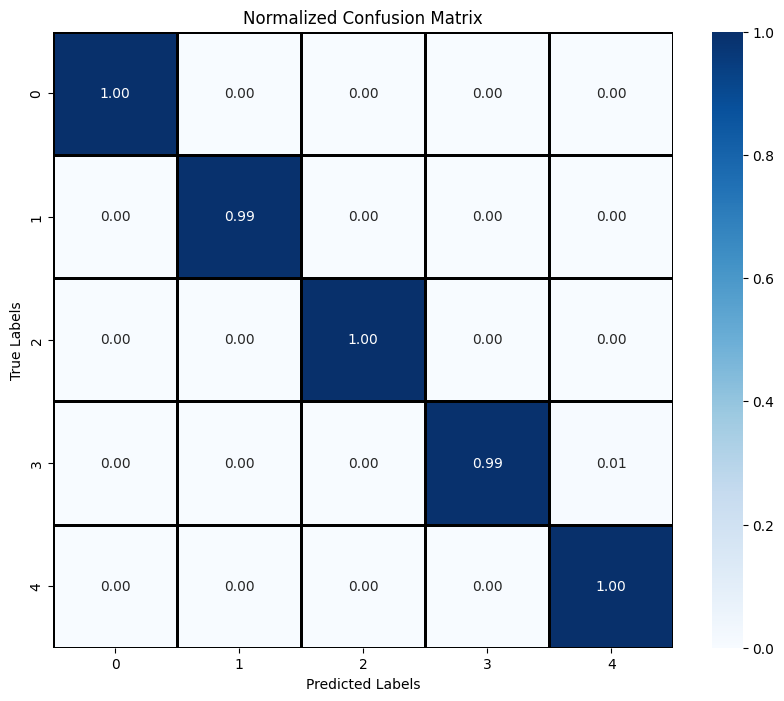

In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(test_labels_class, predicted_classes)

row_sums = conf_matrix.sum(axis=1, keepdims=True)

# Normalize the confusion matrix
normalized_conf_matrix = conf_matrix / row_sums

# Plot the normalized confusion matrix using Seaborn's heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(normalized_conf_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=1, linecolor='black')
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
